In [1]:
import numpy as np
import nbodykit
from scipy.ndimage import gaussian_filter


In [2]:
delta_flux_smooth_v2 = np.load("/gpfs02/work/diffusion/P3D/data/CROL200_deltaf_bf50_red_zoom150.npy")

delta_flux_ex = np.load("./example_gen_field.npy")


In [3]:
from nbodykit.lab import UniformCatalog, FFTPower
#calculate fluxes, do things in flux space
pm_red = nbodykit.source.mesh.array.ArrayMesh(delta_flux_smooth_v2, 200)
pm_ex = nbodykit.source.mesh.array.ArrayMesh(delta_flux_ex, 200)



In [4]:
r_red_2d = FFTPower(pm_red, mode='2d', dk=0.1, kmin=0.0001, Nmu=5, los=[0,0,1], poles=[0,2,4,6,8,10])
poles_red = r_red_2d.poles

r_ex_2d = FFTPower(pm_ex, mode='2d', dk=0.15, kmin=0.0001, Nmu=5, los=[0,0,1], poles=[0,2,4,6,8,10])
poles_ex = r_ex_2d.poles


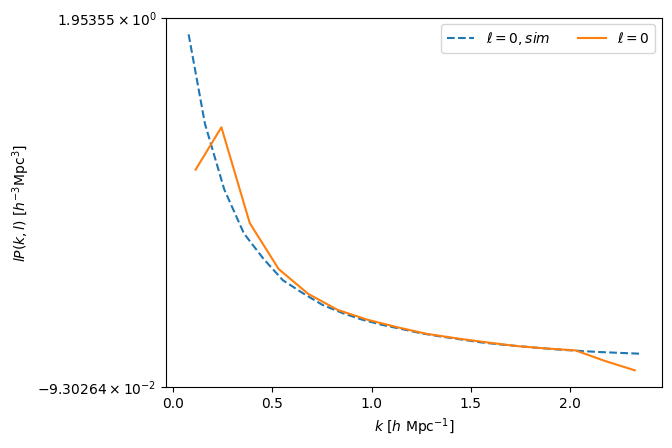

In [5]:
import matplotlib.pyplot as plt

# plot each mu bin
lines = ["r","g","b","k","y"]
# for ell in [0,2,4]:
for ell in [0]:
    label = r'$\ell=%d,sim$' % (ell)
    P = poles_red['power_%d' %ell].real
    # if ell == 0: P = P - poles.attrs['shotnoise']
    plt.plot(poles_red['k'], poles_red['k'] * P, label=label,linestyle='dashed')

plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$lP(k, l)$ [$h^{-3}\mathrm{Mpc}^3$]")

#plot realspace as little dots on top
# for ell in [0,2,4]:
for ell in [0]:
    label = r'$\ell=%d$' % (ell)
    P = poles_ex['power_%d' %ell].real
    # if ell == 0: P = P - poles.attrs['shotnoise']
    plt.plot(poles_ex['k'], poles_ex['k'] * P, label=label)

plt.legend(loc=0, ncol=2)

plt.yscale("symlog")
